In [21]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.metrics import accuracy_score, classification_report
from google.colab import drive

In [22]:
# Mounting Google Drive to access data
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
import numpy as np

# Read data from CSV file
csv_file_path = "/content/drive/MyDrive/OS_Project/test_codes/optimal_node_data_Test1.csv"
df = pd.read_csv(csv_file_path)

# Specify the metric columns
metrics = ["CPU Load (%)", "Memory Usage (%)", "Battery Level (%)", "Load Average"]

# Normalize Metrics (Min-Max Scaling to avoid negative values)
df[metrics] = (df[metrics] - df[metrics].min()) / (df[metrics].max() - df[metrics].min())

# Group by Node_ID
grouped = df.groupby("Node_ID")

# Calculate Uniformity Metrics
uniformity_scores = {}
for node, group in grouped:
    mean_values = group[metrics].mean()  # Mean for each metric
    std_values = group[metrics].std()   # Standard deviation for each metric

    # Calculate Coefficient of Variation (CV) for each metric
    cv_values = (std_values / mean_values).replace(np.inf, 0).fillna(0)

    # Clamp CV to avoid extreme values
    cv_values = cv_values.clip(lower=-10, upper=10)

    # Average CV across all metrics for this node
    uniformity_score = cv_values.mean()
    uniformity_scores[node] = uniformity_score

# Overall Uniformity Score (Optionally Weighted by Row Count)
overall_uniformity_score = np.mean(list(uniformity_scores.values()))

# Output Results
print("Uniformity Scores by Node:")
for node, score in uniformity_scores.items():
    print(f"{node}: {score:.4f}")

print(f"\nOverall Uniformity Score: {overall_uniformity_score:.4f}")



Uniformity Scores by Node:
node_1: 0.5483
node_2: 0.5720
node_3: 0.5779

Overall Uniformity Score: 0.5660


Dataset Summary:
        optimal_score  CPU Load (%)  Memory Usage (%)  Battery Level (%)  \
count      159.000000    159.000000        159.000000         159.000000   
mean         0.014106     17.528302         67.771069          97.993711   
std          0.002917      4.057266          4.521347           3.457695   
min          0.007440     10.700000         61.099998          90.000000   
25%          0.011933     14.050000         62.900002          97.000000   
50%          0.013661     17.299999         67.800003         100.000000   
75%          0.016611     19.950000         71.099998         100.000000   
max          0.021368     32.599998         78.500000         100.000000   

       Load Average  
count    159.000000  
mean       2.525295  
std        0.637700  
min        1.423828  
25%        2.121826  
50%        2.454590  
75%        2.747559  
max        6.874023  

Variance of Metrics per Node:
         CPU Load (%)  Memory Usage (%)  Battery Level (%)  Load Aver

<Figure size 1000x600 with 0 Axes>

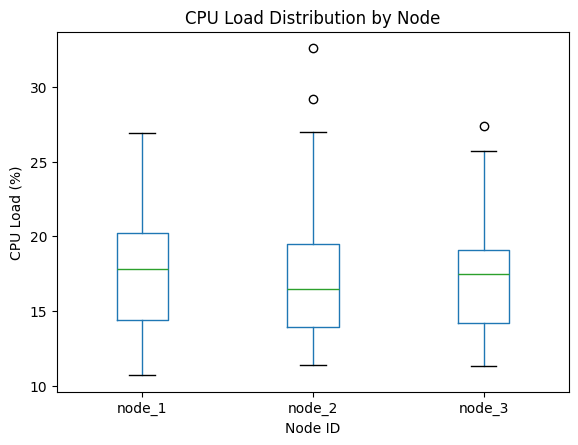

<Figure size 1000x600 with 0 Axes>

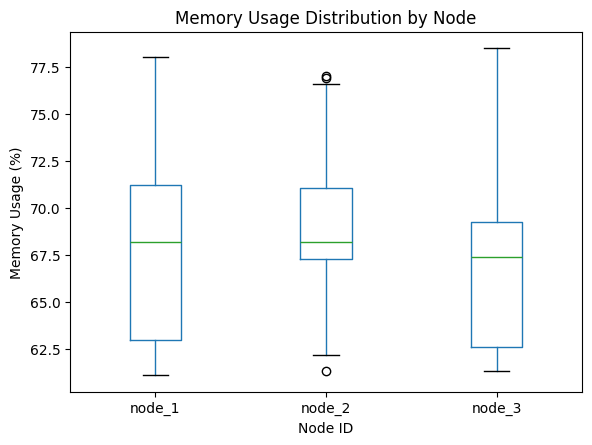

<Figure size 1000x600 with 0 Axes>

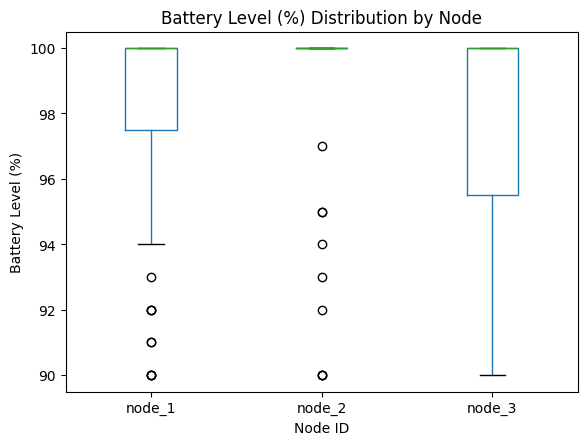

<Figure size 1000x600 with 0 Axes>

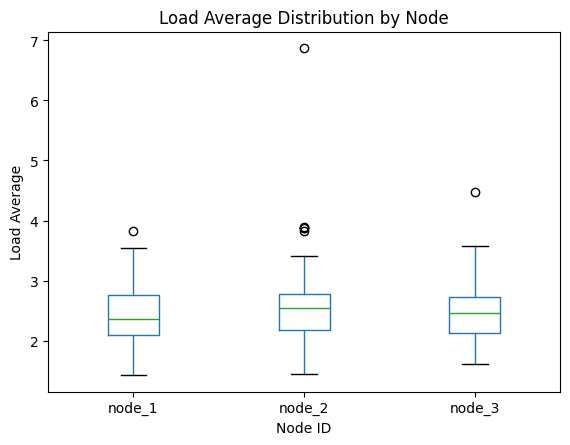

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/OS_Project/test_codes/optimal_node_data_Test1.csv')

# Summarize data
print("Dataset Summary:")
print(df.describe())

# Group data by Node ID
grouped = df.groupby('Node_ID').mean()

# Compute Variance for Metrics
variance_metrics = df.groupby('Node_ID')[['CPU Load (%)', 'Memory Usage (%)', 'Battery Level (%)', 'Load Average']].var()
print("\nVariance of Metrics per Node:")
print(variance_metrics)

# Calculate uniformity using entropy
from scipy.stats import entropy

def calculate_uniformity(df, column):
    counts = df[column].value_counts()
    return entropy(counts)

uniformity = calculate_uniformity(df, 'Node_ID')
print(f"\nUniformity (Entropy) of Node Assignment: {uniformity:.4f}")

# Visualize CPU Load distribution
plt.figure(figsize=(10, 6))
df.boxplot(column='CPU Load (%)', by='Node_ID', grid=False)
plt.title('CPU Load Distribution by Node')
plt.suptitle('')
plt.xlabel('Node ID')
plt.ylabel('CPU Load (%)')
plt.show()

# Visualize CPU Load distribution
plt.figure(figsize=(10, 6))
df.boxplot(column='Memory Usage (%)', by='Node_ID', grid=False)
plt.title('Memory Usage Distribution by Node')
plt.suptitle('')
plt.xlabel('Node ID')
plt.ylabel('Memory Usage (%)')
plt.show()

# Visualize CPU Load distribution
plt.figure(figsize=(10, 6))
df.boxplot(column='Battery Level (%)', by='Node_ID', grid=False)
plt.title('Battery Level (%) Distribution by Node')
plt.suptitle('')
plt.xlabel('Node ID')
plt.ylabel('Battery Level (%)')
plt.show()

# Visualize CPU Load distribution
plt.figure(figsize=(10, 6))
df.boxplot(column='Load Average', by='Node_ID', grid=False)
plt.title('Load Average Distribution by Node')
plt.suptitle('')
plt.xlabel('Node ID')
plt.ylabel('Load Average')
plt.show()

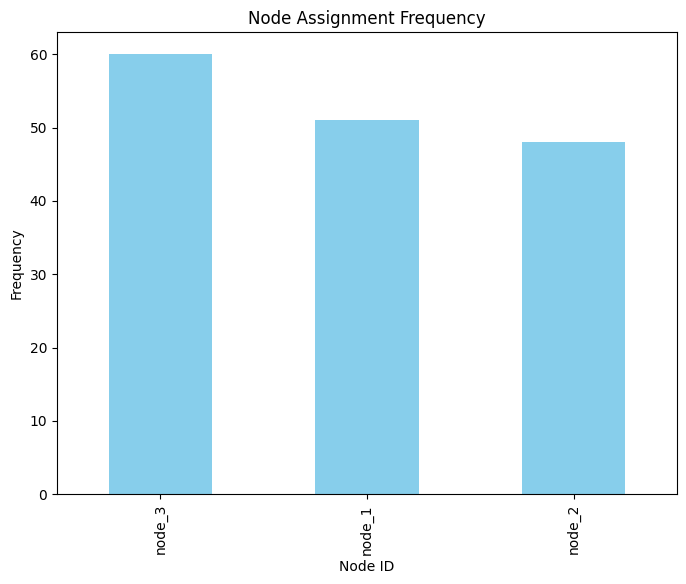


Node Assignment Frequency:
Node_ID
node_3    60
node_1    51
node_2    48
Name: count, dtype: int64


In [27]:
# Calculate node assignment frequency
node_counts = df['Node_ID'].value_counts()

# Visualize node assignment frequency
node_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Node Assignment Frequency')
plt.xlabel('Node ID')
plt.ylabel('Frequency')
plt.show()

print("\nNode Assignment Frequency:")
print(node_counts)


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load data from CSV
file_path = '/content/drive/MyDrive/OS_Project/test_codes/optimal_node_data_Test1.csv'
df = pd.read_csv(file_path)

# Set the node names as the index
df.set_index("Node_ID", inplace=True)

# Drop non-metric columns if present
df = df.drop(columns=['optimal_score'], errors='ignore')

# Standardize Metrics
scaler = StandardScaler()
standardized_metrics = scaler.fit_transform(df)

# Compute Pairwise Euclidean Distances
num_nodes = len(df)
distances = np.zeros((num_nodes, num_nodes))

for i in range(num_nodes):
    for j in range(num_nodes):
        distances[i, j] = np.linalg.norm(standardized_metrics[i] - standardized_metrics[j])

# Aggregate Distances and Compute Variance-Based Uniformity Score
uniformity_score = np.var(distances)  # Variance-based uniformity score

# Output Results
print("Pairwise Distances Matrix:")
print(pd.DataFrame(distances, index=df.index, columns=df.index))
print("\nUniformity Score (lower is better):", uniformity_score)


Pairwise Distances Matrix:
Node_ID    node_3    node_3    node_1    node_3    node_3    node_3    node_1  \
Node_ID                                                                         
node_3   0.000000  1.763020  1.617460  2.366165  1.997038  1.166338  1.962002   
node_3   1.763020  0.000000  3.076243  3.011396  1.151442  2.401665  0.871666   
node_1   1.617460  3.076243  0.000000  1.589349  2.713232  0.858195  3.036899   
node_3   2.366165  3.011396  1.589349  0.000000  2.175690  1.659032  2.978363   
node_3   1.997038  1.151442  2.713232  2.175690  0.000000  2.050869  1.049995   
...           ...       ...       ...       ...       ...       ...       ...   
node_1   4.682331  5.382499  4.320790  4.046231  5.083983  4.639045  5.704673   
node_3   4.283468  4.824979  4.180066  3.898187  4.612505  4.367994  5.181054   
node_2   3.850502  4.234169  4.150835  4.056224  4.248904  4.163387  4.632296   
node_2   3.843013  3.838937  4.529217  4.441694  4.054155  4.343567  4.271840   
n